## Naive LR on all selected variables
- Used all selected var from VAR MAP
- Filled NA with mean

In [1]:
import sys, os
DMOL_DIR = "/Users/Henryye/research/shaf/DMOL"
sys.path.append(os.path.join(DMOL_DIR, "utils"))

from ml_utils import *


import numpy as np
import pandas as pd
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_metrics(y_true, y_pred):
    print("MSE:  {}".format(mean_squared_error(y_true, y_pred)))
    print("MAE:  {}".format(mean_absolute_error(y_true, y_pred)))
    print("r-squared:  {}".format(r2_score(y_true, y_pred)))
    
def plot_results(y_true, y_pred):
    plt.figure(figsize = (8, 3))
    plt.scatter(y_true, y_pred)
    plt.plot(np.linspace(min(y_true), max(y_true)), np.linspace(min(y_true), max(y_true)), '-r')
    plt.xlabel("y true", fontsize = 12)
    plt.ylabel("y pred", fontsize = 12)
    plt.show()

def train_model(df, week_num, use_fr = False, plot = False):
    target = "gr_revq{}".format(week_num)
    var_map_curr = NEW_VAR_MAP["week_{}".format(week_num)]
    var_to_use = [var for var_list in var_map_curr["Quant"].values() for var in var_list] + \
                 ["gr_revq{}".format(i) for i in range(max(1, week_num-1), week_num)]
    if use_fr:
        fr_vars = [var for var_list in var_map_curr["FR"].values() for var in var_list]
        for var in fr_vars:
            if df[var].dtypes != np.dtype('object'):
                var_to_use.append(var)
    
    df_model = df[var_to_use + [target]].copy()
    df_model = df_model.fillna(df_model.mean())
    X, y = df_model[var_to_use].copy(), df_model[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    reg = LinearRegression().fit(X_train, y_train)
    print("Training Score:  ")
    y_train_pred = reg.predict(X_train)
    get_metrics(y_train, y_train_pred)
    print('\n')
    print("Testing Score:   ")
    y_test_pred = reg.predict(X_test)
    get_metrics(y_test, y_test_pred) 
    
    if plot:
        print("Training plots:  ")
        plot_results(y_train, y_train_pred)
        print("Testing plots：  ")
        plot_results(y_test, y_test_pred)

In [3]:
df = pd.read_csv("../data/class_data.csv")
df_proc = preprocess_df(df, verbose = False)

Week 1
Training Score:  
MSE:  1.4330110710625388
MAE:  0.9591278425146578
r-squared:  0.9529045703291137


Testing Score:   
MSE:  596.6431285861267
MAE:  19.42984895772104
r-squared:  -18.354249568927962
Training plots:  


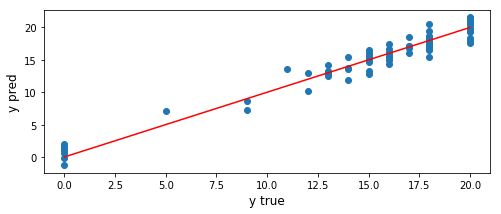

Testing plots：  


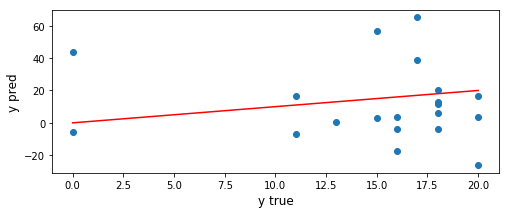




Week 2
Training Score:  
MSE:  10.696233279866302
MAE:  2.4456509390321184
r-squared:  0.6788886713054838


Testing Score:   
MSE:  118.37617368194326
MAE:  8.209799152390413
r-squared:  -1.7820487351808052
Training plots:  


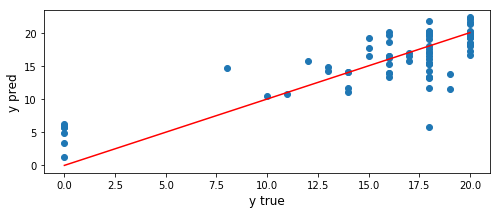

Testing plots：  


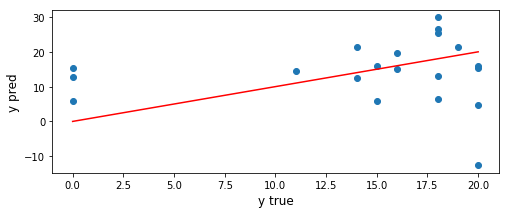




Week 3
Training Score:  
MSE:  8.290328733836414
MAE:  1.9687012045933314
r-squared:  0.718317844819454


Testing Score:   
MSE:  51.673083578010576
MAE:  5.529520776416872
r-squared:  -0.2233211074339625
Training plots:  


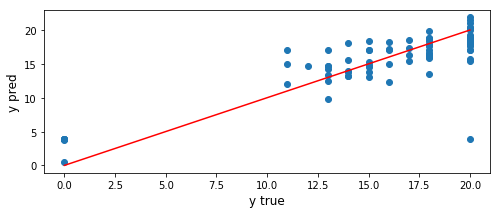

Testing plots：  


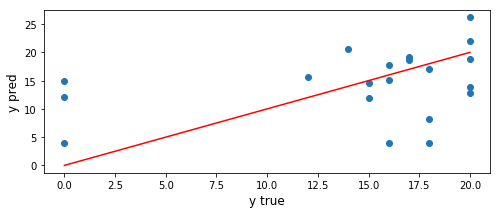




Week 4
Training Score:  
MSE:  5.799635996471945
MAE:  1.7089554750590306
r-squared:  0.8189354477450106


Testing Score:   
MSE:  75.975476156006
MAE:  6.585883957911518
r-squared:  -1.117045660912741
Training plots:  


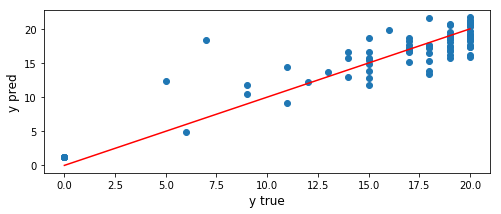

Testing plots：  


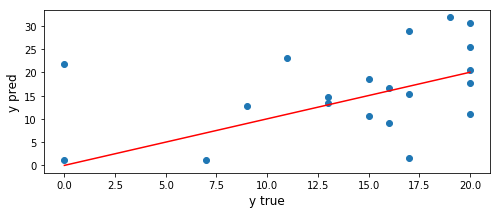




Week 5
Training Score:  
MSE:  7.297895147976917
MAE:  1.6383002151783916
r-squared:  0.8247361638863596


Testing Score:   
MSE:  54.957503234725365
MAE:  5.241297335150487
r-squared:  -0.11453058679224037
Training plots:  


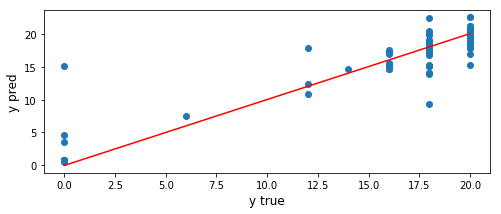

Testing plots：  


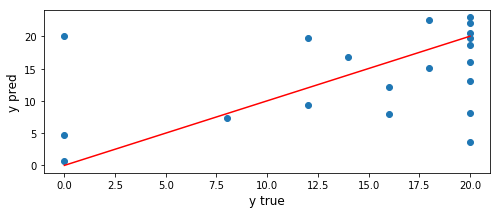

In [4]:
for week_num in range(1, 6):
    print("Week {}".format(week_num))
    train_model(df_proc, week_num, use_fr = False, plot = True)
    print('\n\n')